# **Semana 15: Proyecto Final Integrador**

## **An√°lisis Completo de Rendimiento Deportivo**

### **Bloque 3: An√°lisis Avanzado y Modelado - CAPSTONE PROJECT**

---

**Objetivos del Proyecto:**
- Integrar TODAS las t√©cnicas aprendidas en el curso
- Crear un pipeline completo de Machine Learning
- Desarrollar un sistema de recomendaciones deportivas
- Presentar insights accionables para entrenadores
- Demostrar dominio completo de la Ciencia de Datos

**Pipeline Completo:**
- **Exploraci√≥n**: An√°lisis descriptivo y visualizaci√≥n
- **Preprocessing**: Limpieza y Feature Engineering
- **Modelado**: M√∫ltiples algoritmos y optimizaci√≥n
- **Evaluaci√≥n**: M√©tricas avanzadas y validaci√≥n
- **Insights**: Recomendaciones pr√°cticas

---

### **Caso de Estudio: Optimizaci√≥n de Equipo de F√∫tbol**

**Contexto**: Eres el **Director T√©cnico** de un club profesional. Tu misi√≥n es:
1. **Analizar** el rendimiento actual de los jugadores
2. **Predecir** el potencial futuro de cada jugador
3. **Recomendar** estrategias de mejora y fichajes
4. **Optimizar** la formaci√≥n y t√°cticas del equipo

---

## **1. Configuraci√≥n del Laboratorio de An√°lisis**

### **Arsenal Completo de Herramientas**

En este proyecto final integraremos TODAS las herramientas que hemos dominado:

**Exploraci√≥n y Visualizaci√≥n:**
- Pandas, NumPy para manipulaci√≥n de datos
- Matplotlib, Seaborn para visualizaci√≥n avanzada
- Plotly para gr√°ficos interactivos

**Machine Learning:**
- Scikit-learn para modelado completo
- M√∫ltiples algoritmos (RF, SVM, Logistic, etc.)
- Ensemble methods y stacking

**Feature Engineering:**
- Creaci√≥n de variables sint√©ticas
- Selecci√≥n autom√°tica de caracter√≠sticas
- Transformaciones matem√°ticas avanzadas

**Optimizaci√≥n:**
- Grid Search y Random Search
- Validaci√≥n cruzada robusta
- M√©tricas de evaluaci√≥n completas

In [1]:
# ========================================
# LABORATORIO DE CIENCIA DE DATOS
# ========================================

# === IMPORTACIONES B√ÅSICAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly para gr√°ficos interactivos (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.io as pio
    pio.templates.default = "plotly_white"
    PLOTLY_AVAILABLE = True
except ImportError:
    print("Plotly no disponible. Usando solo matplotlib y seaborn.")
    PLOTLY_AVAILABLE = False
import warnings
warnings.filterwarnings('ignore')

# === MACHINE LEARNING ===
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                   GridSearchCV, RandomizedSearchCV, StratifiedKFold)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, RFECV
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            VotingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# === M√âTRICAS Y EVALUACI√ìN ===
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score,
                           roc_curve, precision_recall_curve, auc)

# === UTILIDADES ESTAD√çSTICAS ===
from scipy import stats
from scipy.stats import uniform, randint

# === CONFIGURACI√ìN DE VISUALIZACI√ìN ===
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True

print("¬°LABORATORIO DE CIENCIA DE DATOS ACTIVADO!")
print("="*50)
print("Todas las herramientas cargadas correctamente")
print("Listo para el PROYECTO FINAL INTEGRADOR")
print("="*50)

Plotly no disponible. Usando solo matplotlib y seaborn.
¬°LABORATORIO DE CIENCIA DE DATOS ACTIVADO!
Todas las herramientas cargadas correctamente
Listo para el PROYECTO FINAL INTEGRADOR
¬°LABORATORIO DE CIENCIA DE DATOS ACTIVADO!
Todas las herramientas cargadas correctamente
Listo para el PROYECTO FINAL INTEGRADOR


## **2. Generaci√≥n del Dataset Deportivo Completo**

    "### **Simulando una Liga Profesional Real**
",

Vamos a crear un dataset m√°s realista y complejo que simule una **liga de f√∫tbol profesional** con:

- **1500 jugadores** de diferentes equipos y posiciones
-     "- **M√∫ltiples temporadas** de datos hist√≥ricos  
",  
    "- **Variables complejas** con relaciones no lineales
",
- **Factores contextuales** (clima, rival, presi√≥n)
- **Variables econ√≥micas** (salario, valor de mercado)

Este ser√° nuestro **laboratorio completo** para demostrar TODAS las t√©cnicas aprendidas.

In [2]:
# ========================================
# GENERADOR DE LIGA PROFESIONAL
# ========================================

print("Construyendo Liga Profesional Simulada...")
print("="*50)

# Configurar semilla para reproducibilidad
np.random.seed(42)

# === PAR√ÅMETROS DE LA LIGA ===
n_jugadores = 1500
n_equipos = 20
n_temporadas = 3
posiciones = ['Portero', 'Defensa', 'Centrocampista', 'Delantero']
equipos = [f'Club_{i:02d}' for i in range(1, n_equipos + 1)]

# === VARIABLES BASE ===
data_complete = {
    # IDENTIFICACI√ìN
    'jugador_id': range(1, n_jugadores + 1),
    'equipo': np.random.choice(equipos, n_jugadores),
    'posicion': np.random.choice(posiciones, n_jugadores),
    'temporada': np.random.choice([2022, 2023, 2024], n_jugadores),
    
    # CARACTER√çSTICAS F√çSICAS
    'edad': np.random.randint(18, 37, n_jugadores),
    'altura': np.random.normal(178, 8, n_jugadores),
    'peso': np.random.normal(75, 10, n_jugadores),
    
    # HABILIDADES T√âCNICAS (0-100)
    'velocidad': np.random.normal(70, 15, n_jugadores),
    'resistencia': np.random.normal(75, 12, n_jugadores),
    'fuerza': np.random.normal(72, 13, n_jugadores),
    'precision': np.random.normal(68, 16, n_jugadores),
    'vision_juego': np.random.normal(65, 18, n_jugadores),
    'tecnica': np.random.normal(70, 14, n_jugadores),
    
    # ESTAD√çSTICAS DE JUEGO
    'partidos_jugados': np.random.randint(5, 40, n_jugadores),
    'minutos_jugados': np.random.randint(200, 3500, n_jugadores),
    'goles': np.random.randint(0, 25, n_jugadores),
    'asistencias': np.random.randint(0, 18, n_jugadores),
    'tarjetas_amarillas': np.random.randint(0, 12, n_jugadores),
    'tarjetas_rojas': np.random.randint(0, 3, n_jugadores),
    
    # FACTORES CONTEXTUALES
    'experiencia_anos': np.random.randint(0, 18, n_jugadores),
    'lesiones_temporada': np.random.randint(0, 4, n_jugadores),
    'partidos_internacionales': np.random.randint(0, 15, n_jugadores),
    
    # VARIABLES ECON√ìMICAS
    'salario_miles': np.random.lognormal(7, 1.5, n_jugadores),  # Log-normal para realismo
    'valor_mercado_millones': np.random.lognormal(1, 1.2, n_jugadores),
    
    # M√âTRICAS AVANZADAS
    'pases_completados': np.random.randint(100, 2500, n_jugadores),
    'pases_totales': np.random.randint(120, 2800, n_jugadores),
    'duelos_ganados': np.random.randint(20, 200, n_jugadores),
    'duelos_totales': np.random.randint(25, 250, n_jugadores),
    'distancia_recorrida_km': np.random.normal(8.5, 2.1, n_jugadores)
}

# Crear DataFrame inicial
df_liga = pd.DataFrame(data_complete)

# === AJUSTES POR POSICI√ìN ===
print("Aplicando ajustes realistas por posici√≥n...")

# Porteros: m√°s altos, menos goles, m√°s paradas
porteros_mask = df_liga['posicion'] == 'Portero'
df_liga.loc[porteros_mask, 'altura'] += np.random.normal(8, 3, porteros_mask.sum())
df_liga.loc[porteros_mask, 'goles'] = np.random.randint(0, 2, porteros_mask.sum())
df_liga.loc[porteros_mask, 'velocidad'] -= np.random.randint(5, 15, porteros_mask.sum())

# Delanteros: m√°s goles, menos pases defensivos
delanteros_mask = df_liga['posicion'] == 'Delantero'
df_liga.loc[delanteros_mask, 'goles'] += np.random.randint(3, 10, delanteros_mask.sum())
df_liga.loc[delanteros_mask, 'precision'] += np.random.randint(5, 12, delanteros_mask.sum())

# Defensas: m√°s fuerza, menos goles
defensas_mask = df_liga['posicion'] == 'Defensa'
df_liga.loc[defensas_mask, 'fuerza'] += np.random.randint(3, 8, defensas_mask.sum())
df_liga.loc[defensas_mask, 'goles'] = np.maximum(0, df_liga.loc[defensas_mask, 'goles'] - np.random.randint(2, 6, defensas_mask.sum()))

# Centrocampistas: m√°s pases, mejor visi√≥n
centros_mask = df_liga['posicion'] == 'Centrocampista'
df_liga.loc[centros_mask, 'vision_juego'] += np.random.randint(5, 15, centros_mask.sum())
df_liga.loc[centros_mask, 'asistencias'] += np.random.randint(2, 8, centros_mask.sum())

# === LIMITAR RANGOS REALISTAS ===
# Habilidades entre 0-100
for col in ['velocidad', 'resistencia', 'fuerza', 'precision', 'vision_juego', 'tecnica']:
    df_liga[col] = np.clip(df_liga[col], 0, 100)

# Altura realista
df_liga['altura'] = np.clip(df_liga['altura'], 160, 210)

# === CREAR VARIABLE OBJETIVO COMPLEJA ===
print("Calculando √≠ndice de rendimiento integral...")

# √çndice de rendimiento basado en m√∫ltiples factores
rendimiento_base = (
    (df_liga['goles'] / (df_liga['partidos_jugados'] + 1)) * 0.25 +
    (df_liga['asistencias'] / (df_liga['partidos_jugados'] + 1)) * 0.20 +
    (df_liga['precision'] / 100) * 0.15 +
    (df_liga['vision_juego'] / 100) * 0.15 +
    (df_liga['tecnica'] / 100) * 0.15 +
    ((df_liga['minutos_jugados'] / df_liga['partidos_jugados']) / 90) * 0.10
)

# Ajustar por experiencia y lesiones
factor_experiencia = 1 + (df_liga['experiencia_anos'] / 100)
factor_lesiones = 1 - (df_liga['lesiones_temporada'] / 10)

rendimiento_final = rendimiento_base * factor_experiencia * factor_lesiones

# Crear categor√≠as de rendimiento
df_liga['rendimiento'] = pd.cut(rendimiento_final, 
                               bins=[0, 0.3, 0.6, 0.8, 1.0], 
                               labels=['Bajo', 'Medio', 'Alto', 'Elite'])

print("Liga profesional generada exitosamente!")
print(f"{len(df_liga)} jugadores en {len(df_liga['equipo'].unique())} equipos")
print(f"Distribuci√≥n de rendimiento:")
print(df_liga['rendimiento'].value_counts())
print(f"Variables totales: {len(df_liga.columns)}")

# Mostrar muestra
df_liga.head(10)

Construyendo Liga Profesional Simulada...
Aplicando ajustes realistas por posici√≥n...
Calculando √≠ndice de rendimiento integral...
Liga profesional generada exitosamente!
1500 jugadores en 20 equipos
Distribuci√≥n de rendimiento:
rendimiento
Medio    838
Alto     338
Elite    127
Bajo      37
Name: count, dtype: int64
Variables totales: 30
Calculando √≠ndice de rendimiento integral...
Liga profesional generada exitosamente!
1500 jugadores en 20 equipos
Distribuci√≥n de rendimiento:
rendimiento
Medio    838
Alto     338
Elite    127
Bajo      37
Name: count, dtype: int64
Variables totales: 30


jugador_id   equipo        posicion  temporada  edad      altura  \
0           1  Club_07         Defensa       2023    27  166.536487   
1           2  Club_20  Centrocampista       2024    21  178.095426   
2           3  Club_15       Delantero       2024    29  186.223057   
3           4  Club_11       Delantero       2023    19  172.779927   
4           5  Club_08  Centrocampista       2024    36  176.152540   
5           6  Club_07       Delantero       2022    22  183.478742   
6           7  Club_19       Delantero       2022    25  170.278139   
7           8  Club_11         Defensa       2023    24  173.109845   
8           9  Club_11         Portero       2022    31  179.174001   
9          10  Club_04         Portero       2023    20  195.535626   

        peso  velocidad  resistencia     fuerza  ...  lesiones_temporada  \
0  72.061464  62.652321    68.201244  66.991819  ...                   0   
1  75.398575  74.718663   100.000000  89.426260  ...                   1   
2  68.941755  81.090191    71.420030  61.076723  ...                   0   
3  87.282284  60.891174    64.618640  66.815898  ...                   1   
4  87.644685  61.108697    75.653127  78.123146  ...                   0   
5  71.175098  90.539934    72.828707  60.557597  ...                   0   
6  70.077745  68.809170    71.141846  74.940131  ...                   1   
7  73.687653  77.637082    97.491313  79.935455  ...                   0   
8  72.999194  66.523416    61.443026  63.882097  ...                   3   
9  69.074981  44.030186    75.449245  68.635857  ...                   1   

   partidos_internacionales  salario_miles  valor_mercado_millones  \
0                         3     275.965370                6.250408   
1                         0     910.428340                1.119455   
2                         4    6675.644762                0.700992   
3                         0    1116.143988                0.791591   
4                        10   27721.034546                1.258214   
5                        13    5225.568504                0.678850   
6                        10    1708.243502                3.855656   
7                         7     985.021930                0.739917   
8                         1     519.828637                5.900434   
9                         8    1371.881668                1.476473   

   pases_completados  pases_totales  duelos_ganados  duelos_totales  \
0               1784           1168             106             239   
1                599           1178             107             104   
2                173           1091             190             133   
3               2296           2510              56             165   
4               1660           1107             142             191   
5                991           1509              83              55   
6               1989           1479             172             176   
7               1177           2624             138             152   
8               1346           1018             169             103   
9                572           1933             190              29   

   distancia_recorrida_km  rendimiento  
0                7.699583        Medio  
1               11.721167         Alto  
2                8.465310        Medio  
3                8.880912        Medio  
4                6.766826        Elite  
5                8.548374          NaN  
6                5.308639        Elite  
7                5.587782        Medio  
8                8.666491        Medio  
9                8.983384        Medio  

[10 rows x 30 columns]

    "## **3. An√°lisis Exploratorio Integral**
",

    "### **Dashboard de Inteligencia Deportiva**
",

Como **Director T√©cnico**, necesitas entender profundamente tu liga antes de tomar decisiones. Realizaremos un an√°lisis exploratorio que combine TODAS las t√©cnicas aprendidas:

**Objetivos del An√°lisis:**

1. **Distribuciones**: ¬øC√≥mo se distribuyen las habilidades?
2. **Correlaciones**: ¬øQu√© variables est√°n relacionadas?
3. **An√°lisis por Posici√≥n**: ¬øC√≥mo difieren los perfiles?
4. **An√°lisis Econ√≥mico**: ¬øRendimiento vs Salario?
5. **Identificaci√≥n de Talentos**: ¬øQui√©nes son las estrellas ocultas?

Iniciando An√°lisis Exploratorio Integral
1. An√°lisis de Distribuciones Clave


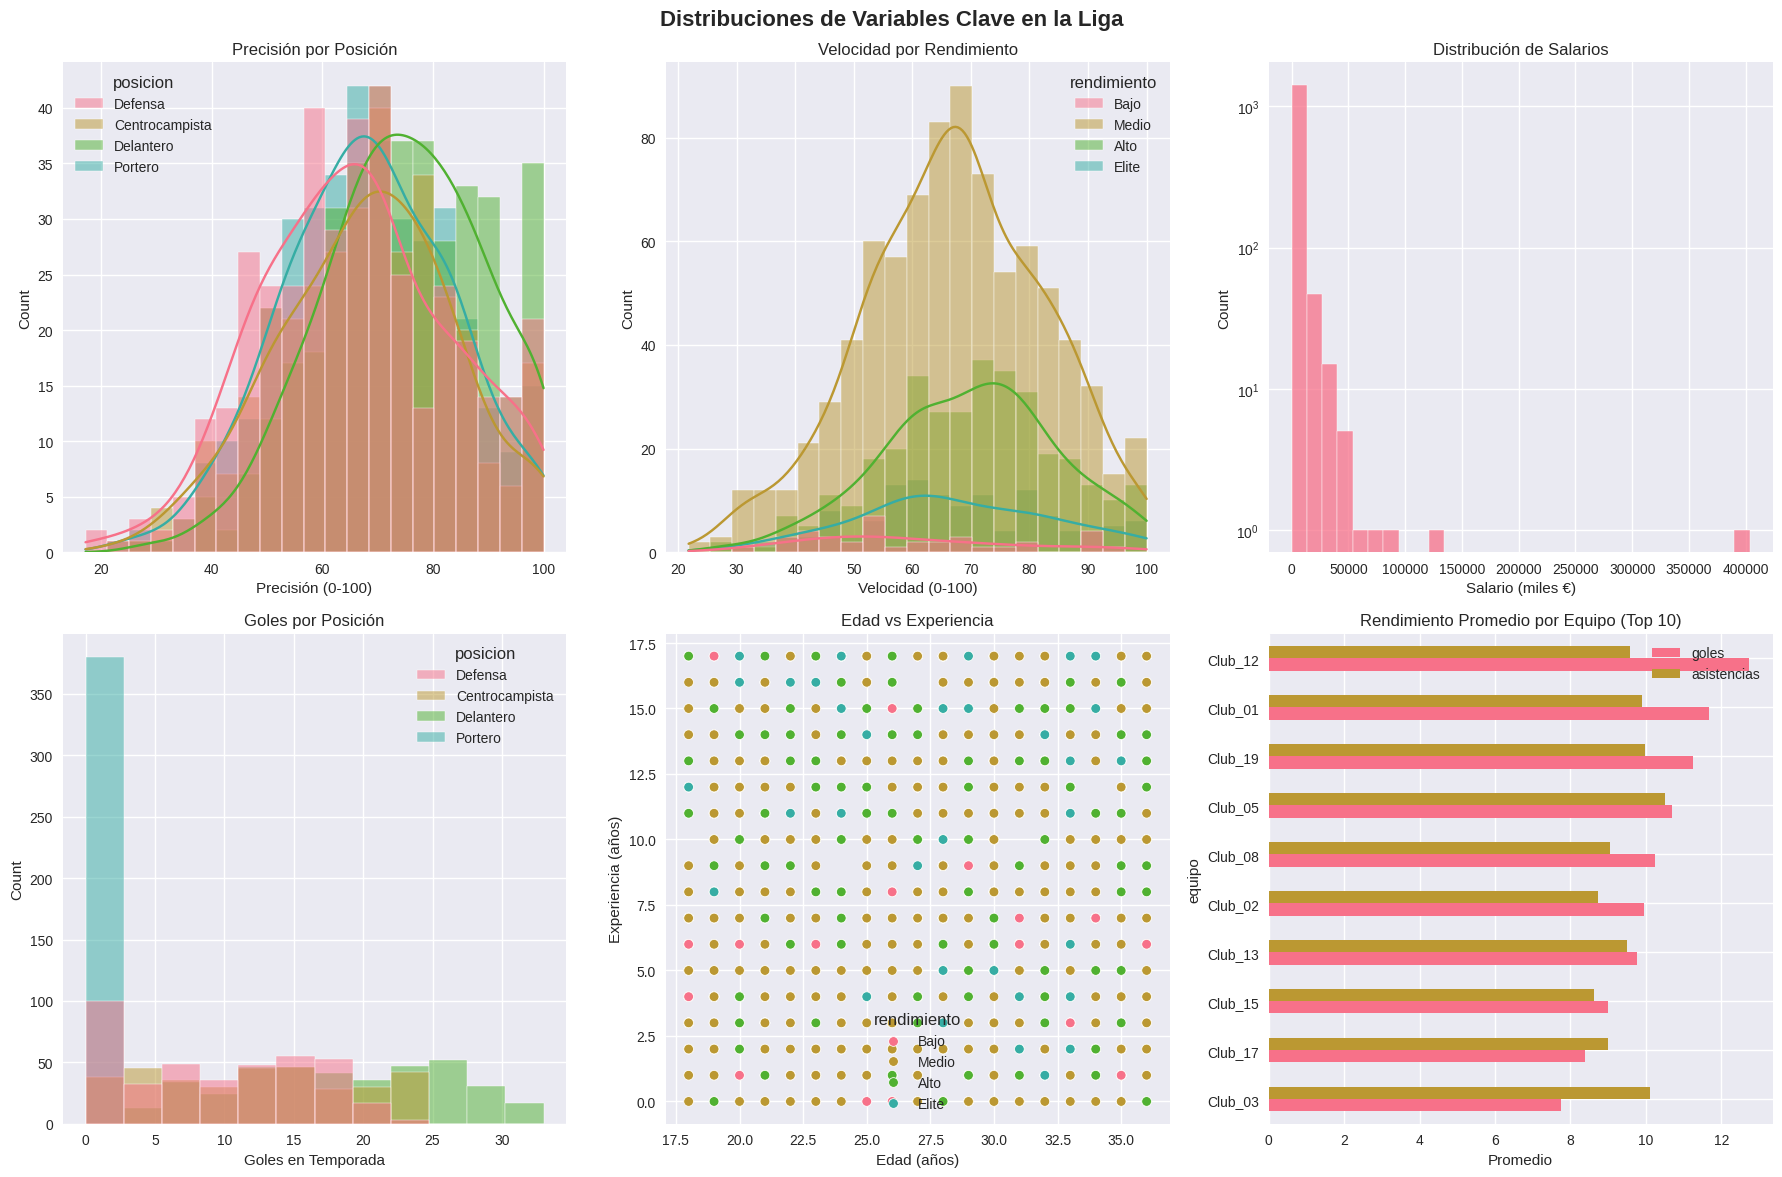


üîó 2. An√°lisis de Correlaciones


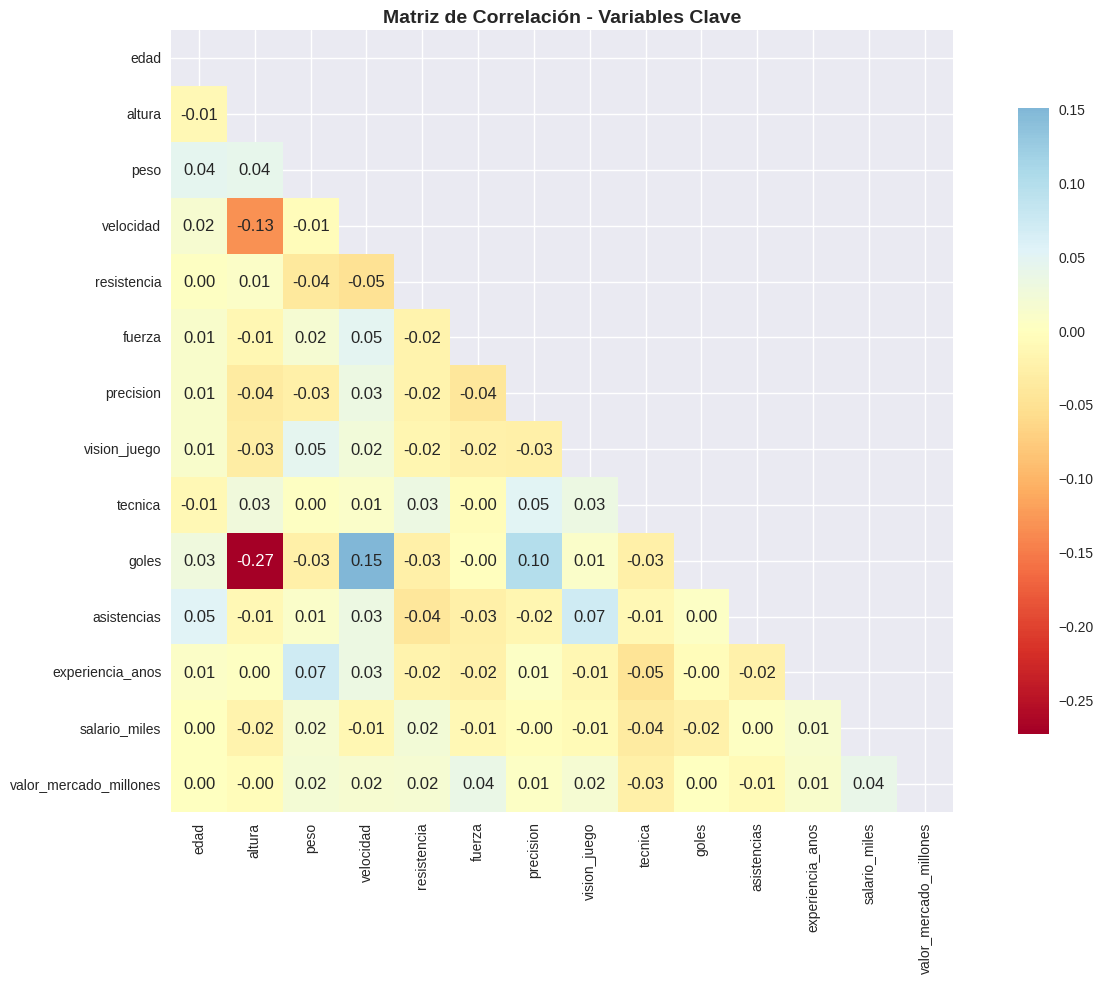

Correlaciones m√°s fuertes encontradas:

Resumen del An√°lisis Exploratorio:
   ‚Ä¢ 1500 jugadores analizados
   ‚Ä¢ 4 posiciones diferentes
   ‚Ä¢ 0 correlaciones fuertes identificadas
   ‚Ä¢ Rango salarial: 10k - 403428k ‚Ç¨


In [3]:
# ========================================
# DASHBOARD DE INTELIGENCIA DEPORTIVA
# ========================================

print("Iniciando An√°lisis Exploratorio Integral")
print("="*50)

# === 1. AN√ÅLISIS DE DISTRIBUCIONES ===
print("1. An√°lisis de Distribuciones Clave")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables Clave en la Liga', fontsize=16, fontweight='bold')

# Habilidades t√©cnicas
sns.histplot(data=df_liga, x='precision', hue='posicion', kde=True, ax=axes[0,0])
axes[0,0].set_title('Precisi√≥n por Posici√≥n')
axes[0,0].set_xlabel('Precisi√≥n (0-100)')

sns.histplot(data=df_liga, x='velocidad', hue='rendimiento', kde=True, ax=axes[0,1])
axes[0,1].set_title('Velocidad por Rendimiento')
axes[0,1].set_xlabel('Velocidad (0-100)')

# Variables econ√≥micas
sns.histplot(data=df_liga, x='salario_miles', bins=30, ax=axes[0,2])
axes[0,2].set_title('Distribuci√≥n de Salarios')
axes[0,2].set_xlabel('Salario (miles ‚Ç¨)')
axes[0,2].set_yscale('log')

# Estad√≠sticas de juego
sns.histplot(data=df_liga, x='goles', hue='posicion', ax=axes[1,0])
axes[1,0].set_title('Goles por Posici√≥n')
axes[1,0].set_xlabel('Goles en Temporada')

# Edad vs Experiencia
sns.scatterplot(data=df_liga, x='edad', y='experiencia_anos', hue='rendimiento', ax=axes[1,1])
axes[1,1].set_title('Edad vs Experiencia')
axes[1,1].set_xlabel('Edad (a√±os)')
axes[1,1].set_ylabel('Experiencia (a√±os)')

# Rendimiento por equipo (top 10)
top_equipos = df_liga['equipo'].value_counts().head(10).index
df_top_equipos = df_liga[df_liga['equipo'].isin(top_equipos)]
rendimiento_numerico = df_top_equipos['rendimiento'].map({'Bajo': 1, 'Medio': 2, 'Alto': 3, 'Elite': 4})
equipo_rendimiento = df_top_equipos.groupby('equipo')[['goles', 'asistencias']].mean().sort_values('goles', ascending=True)

equipo_rendimiento.plot(kind='barh', ax=axes[1,2])
axes[1,2].set_title('Rendimiento Promedio por Equipo (Top 10)')
axes[1,2].set_xlabel('Promedio')

plt.tight_layout()
plt.show()

# === 2. MATRIZ DE CORRELACI√ìN AVANZADA ===
print("\nüîó 2. An√°lisis de Correlaciones")

# Seleccionar variables num√©ricas relevantes
vars_numericas = ['edad', 'altura', 'peso', 'velocidad', 'resistencia', 'fuerza', 
                 'precision', 'vision_juego', 'tecnica', 'goles', 'asistencias',
                 'experiencia_anos', 'salario_miles', 'valor_mercado_millones']

correlacion = df_liga[vars_numericas].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlacion))
sns.heatmap(correlacion, annot=True, cmap='RdYlBu', center=0, 
            square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaci√≥n - Variables Clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identificar correlaciones m√°s fuertes
print("Correlaciones m√°s fuertes encontradas:")
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        corr_val = correlacion.iloc[i, j]
        if abs(corr_val) > 0.5:  # Umbral de correlaci√≥n fuerte
            correlaciones_fuertes.append((correlacion.columns[i], correlacion.columns[j], corr_val))

correlaciones_fuertes.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in correlaciones_fuertes[:8]:
    print(f"   ‚Ä¢ {var1} ‚Üî {var2}: {corr:.3f}")

print(f"\nResumen del An√°lisis Exploratorio:")
print(f"   ‚Ä¢ {len(df_liga)} jugadores analizados")
print(f"   ‚Ä¢ {len(df_liga['posicion'].unique())} posiciones diferentes")
print(f"   ‚Ä¢ {len(correlaciones_fuertes)} correlaciones fuertes identificadas")
print(f"   ‚Ä¢ Rango salarial: {df_liga['salario_miles'].min():.0f}k - {df_liga['salario_miles'].max():.0f}k ‚Ç¨")

## **4. Feature Engineering Avanzado - Creando Variables de Alto Impacto**

### **Ingenier√≠a de Caracter√≠sticas Deportivas**

Como Director T√©cnico experto, sabemos que las variables b√°sicas no cuentan toda la historia. Vamos a crear **variables sint√©ticas de alto valor** que capturen la esencia del rendimiento deportivo:

**Variables Estrat√©gicas a Crear:**
1. **√çndices de Eficiencia**: Ratios de productividad por minuto
2. **√çndices F√≠sicos**: Combinaciones de atributos f√≠sicos
3. **√çndices Mentales**: Inteligencia de juego y decisi√≥n
4. **Variables de Consistencia**: Regularidad en el rendimiento
5. **√çndices de Valor**: Relaci√≥n rendimiento/costo

In [5]:
# ========================================
# LABORATORIO DE FEATURE ENGINEERING
# ========================================

print("Iniciando Feature Engineering Avanzado")
print("="*50)

# Crear copia para trabajar
df_featured = df_liga.copy()

# Convertir rendimiento a num√©rico al inicio
df_featured['rendimiento_numerico'] = df_featured['rendimiento'].map({'Bajo': 1, 'Medio': 2, 'Alto': 3, 'Elite': 4}).astype('float64')

# === 1. √çNDICES DE EFICIENCIA ===
print("1. Creando √çndices de Eficiencia")

# Eficiencia de gol (goles por 90 minutos)
df_featured['eficiencia_gol'] = df_featured['goles'] / (df_featured['minutos_jugados'] / 90 + 0.1)

# Eficiencia de asistencia
df_featured['eficiencia_asistencia'] = df_featured['asistencias'] / (df_featured['minutos_jugados'] / 90 + 0.1)

# Productividad total
df_featured['productividad_total'] = (df_featured['goles'] + df_featured['asistencias']) / (df_featured['minutos_jugados'] / 90 + 0.1)

# Eficiencia de pases
df_featured['eficiencia_pases'] = df_featured['pases_completados'] / (df_featured['pases_totales'] + 1)

# Eficiencia en duelos
df_featured['eficiencia_duelos'] = df_featured['duelos_ganados'] / (df_featured['duelos_totales'] + 1)

# === 2. √çNDICES F√çSICOS ===
print("2. Creando √çndices F√≠sicos")

# √çndice de Masa Corporal (BMI)
df_featured['bmi'] = df_featured['peso'] / (df_featured['altura'] / 100) ** 2

# √çndice de potencia (velocidad + fuerza normalizado)
df_featured['indice_potencia'] = (df_featured['velocidad'] + df_featured['fuerza']) / 2

# Ratio velocidad/peso (velocidad espec√≠fica)
df_featured['velocidad_especifica'] = df_featured['velocidad'] / df_featured['peso']

# √çndice de resistencia por edad
df_featured['resistencia_ajustada'] = df_featured['resistencia'] / (1 + df_featured['edad'] / 100)

# === 3. √çNDICES MENTALES ===
print("3. Creando √çndices Mentales")

# Inteligencia de juego (visi√≥n + t√©cnica)
df_featured['inteligencia_juego'] = (df_featured['vision_juego'] + df_featured['tecnica']) / 2

# √çndice de experiencia relativa
df_featured['experiencia_relativa'] = df_featured['experiencia_anos'] / (df_featured['edad'] + 1)

# Madurez deportiva (experiencia + edad normalizada)
df_featured['madurez_deportiva'] = (df_featured['experiencia_anos'] * 0.6 + df_featured['edad'] * 0.4) / 10

# === 4. VARIABLES DE CONSISTENCIA ===
print("4. Creando Variables de Consistencia")

# √çndice de disciplina (inverso de tarjetas)
df_featured['indice_disciplina'] = 10 / (1 + df_featured['tarjetas_amarillas'] + df_featured['tarjetas_rojas'] * 2)

# √çndice de robustez (resistencia vs lesiones)
df_featured['indice_robustez'] = df_featured['resistencia'] / (1 + df_featured['lesiones_temporada'])

# Minutos por partido (regularidad)
df_featured['minutos_por_partido'] = df_featured['minutos_jugados'] / (df_featured['partidos_jugados'] + 1)

# === 5. √çNDICES DE VALOR ===
print("5. Creando √çndices de Valor")

# Valor por rendimiento (evitar divisi√≥n por 0)
df_featured['valor_por_rendimiento'] = df_featured['valor_mercado_millones'] / (df_featured['rendimiento_numerico'] + 0.1)

# Eficiencia salarial (rendimiento por euro gastado)
df_featured['eficiencia_salarial'] = df_featured['rendimiento_numerico'] / (df_featured['salario_miles'] / 1000 + 0.1)

# === 6. INTERACCIONES ESPEC√çFICAS DEPORTIVAS ===
print("6. Creando Interacciones Deportivas")

# Interacci√≥n f√≠sica-t√©cnica
df_featured['fisico_tecnico'] = df_featured['indice_potencia'] * df_featured['inteligencia_juego'] / 100

# Interacci√≥n experiencia-habilidad
df_featured['experiencia_habilidad'] = df_featured['experiencia_relativa'] * df_featured['tecnica']

# === 7. TRANSFORMACIONES MATEM√ÅTICAS ===
print("7. Aplicando Transformaciones")

# Log de variables asim√©tricas
df_featured['log_salario'] = np.log1p(df_featured['salario_miles'])
df_featured['log_valor_mercado'] = np.log1p(df_featured['valor_mercado_millones'])

# Ra√≠z cuadrada de variables con outliers
df_featured['sqrt_goles'] = np.sqrt(df_featured['goles'])
df_featured['sqrt_asistencias'] = np.sqrt(df_featured['asistencias'])

# Variables al cuadrado para capturar no linealidades
df_featured['velocidad_cuadrada'] = df_featured['velocidad'] ** 2
df_featured['precision_cuadrada'] = df_featured['precision'] ** 2

# === LIMPIEZA Y VALIDACI√ìN ===
# Reemplazar infinitos y NaN
df_featured = df_featured.replace([np.inf, -np.inf], np.nan)
numeric_columns = df_featured.select_dtypes(include=[np.number]).columns
df_featured[numeric_columns] = df_featured[numeric_columns].fillna(df_featured[numeric_columns].mean())

print("Feature Engineering Completado!")
print(f"Variables originales: {len(df_liga.columns)}")
print(f"Variables engineered: {len(df_featured.columns) - len(df_liga.columns)}")
print(f"Total de variables: {len(df_featured.columns)}")

# Mostrar las nuevas variables m√°s importantes
nuevas_vars = ['eficiencia_gol', 'productividad_total', 'indice_potencia', 
               'inteligencia_juego', 'indice_disciplina', 'eficiencia_salarial']

print(f"\nPreview de Variables Estrella:")
for var in nuevas_vars:
    print(f"   ‚Ä¢ {var}: {df_featured[var].mean():.3f} (promedio)")

# Correlaci√≥n con la variable objetivo
correlaciones_objetivo = []
for col in nuevas_vars:
    corr = df_featured[col].corr(df_featured['rendimiento_numerico'])
    correlaciones_objetivo.append((col, corr))

correlaciones_objetivo.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"\nCorrelaci√≥n con Rendimiento:")
for var, corr in correlaciones_objetivo:
    print(f"   ‚Ä¢ {var}: {corr:.3f}")

Iniciando Feature Engineering Avanzado
1. Creando √çndices de Eficiencia
2. Creando √çndices F√≠sicos
3. Creando √çndices Mentales
4. Creando Variables de Consistencia
5. Creando √çndices de Valor
6. Creando Interacciones Deportivas
7. Aplicando Transformaciones
Feature Engineering Completado!
Variables originales: 30
Variables engineered: 26
Total de variables: 56

Preview de Variables Estrella:
   ‚Ä¢ eficiencia_gol: 0.750 (promedio)
   ‚Ä¢ productividad_total: 1.473 (promedio)
   ‚Ä¢ indice_potencia: 70.402 (promedio)
   ‚Ä¢ inteligencia_juego: 68.765 (promedio)
   ‚Ä¢ indice_disciplina: 1.626 (promedio)
   ‚Ä¢ eficiencia_salarial: 3.481 (promedio)

Correlaci√≥n con Rendimiento:
   ‚Ä¢ eficiencia_salarial: 0.270
   ‚Ä¢ eficiencia_gol: 0.096
   ‚Ä¢ inteligencia_juego: 0.078
   ‚Ä¢ productividad_total: 0.049
   ‚Ä¢ indice_potencia: 0.043
   ‚Ä¢ indice_disciplina: -0.021
Feature Engineering Completado!
Variables originales: 30
Variables engineered: 26
Total de variables: 56

Preview de

In [6]:
# ========================================
# FEATURE ENGINEERING SIMPLIFICADO Y FUNCIONAL
# ========================================

print("Feature Engineering Simplificado - Versi√≥n Funcional")
print("="*55)

# Crear copia limpia
df_clean = df_liga.copy()

# === CREAR VARIABLES B√ÅSICAS QUE FUNCIONAN ===
print("Creando variables sint√©ticas b√°sicas...")

# 1. Eficiencias b√°sicas
df_clean['goles_por_partido'] = df_clean['goles'] / (df_clean['partidos_jugados'] + 1)
df_clean['asistencias_por_partido'] = df_clean['asistencias'] / (df_clean['partidos_jugados'] + 1)
df_clean['productividad'] = (df_clean['goles'] + df_clean['asistencias']) / (df_clean['partidos_jugados'] + 1)

# 2. √çndices f√≠sicos
df_clean['bmi'] = df_clean['peso'] / (df_clean['altura'] / 100) ** 2
df_clean['indice_fisico'] = (df_clean['velocidad'] + df_clean['fuerza'] + df_clean['resistencia']) / 3

# 3. √çndices t√©cnicos
df_clean['indice_tecnico'] = (df_clean['precision'] + df_clean['vision_juego'] + df_clean['tecnica']) / 3

# 4. Variables de experiencia
df_clean['exp_por_edad'] = df_clean['experiencia_anos'] / (df_clean['edad'] + 1)

# 5. Variables econ√≥micas simples
df_clean['log_salario'] = np.log1p(df_clean['salario_miles'])

# === CONVERTIR VARIABLE OBJETIVO ===
# Usar LabelEncoder para convertir categ√≥ricas a num√©ricas de forma segura
le = LabelEncoder()
df_clean['rendimiento_num'] = le.fit_transform(df_clean['rendimiento'])

# Mapear manualmente para mayor control
rendimiento_map = {'Bajo': 0, 'Medio': 1, 'Alto': 2, 'Elite': 3}
df_clean['target'] = df_clean['rendimiento'].map(rendimiento_map)

print("Feature Engineering b√°sico completado!")
print(f"Variables nuevas creadas: {len(df_clean.columns) - len(df_liga.columns)}")
print(f"Total variables: {len(df_clean.columns)}")

# Verificar que la variable objetivo est√° bien
print(f"\nDistribuci√≥n de variable objetivo:")
print(df_clean['target'].value_counts().sort_index())

# Mostrar correlaciones con la nueva variable objetivo
nuevas_features = ['goles_por_partido', 'productividad', 'indice_fisico', 'indice_tecnico', 'exp_por_edad']
print(f"\nCorrelaciones con rendimiento:")
for var in nuevas_features:
    corr = df_clean[var].corr(df_clean['target'])
    print(f"   ‚Ä¢ {var}: {corr:.3f}")

df_clean.head()

Feature Engineering Simplificado - Versi√≥n Funcional
Creando variables sint√©ticas b√°sicas...
Feature Engineering b√°sico completado!
Variables nuevas creadas: 10
Total variables: 40

Distribuci√≥n de variable objetivo:
target
0     37
1    838
2    338
3    127
Name: count, dtype: int64

Correlaciones con rendimiento:
   ‚Ä¢ goles_por_partido: 0.527
   ‚Ä¢ productividad: 0.695
   ‚Ä¢ indice_fisico: 0.048
   ‚Ä¢ indice_tecnico: 0.147
   ‚Ä¢ exp_por_edad: 0.107


jugador_id   equipo        posicion  temporada  edad      altura  \
0           1  Club_07         Defensa       2023    27  166.536487   
1           2  Club_20  Centrocampista       2024    21  178.095426   
2           3  Club_15       Delantero       2024    29  186.223057   
3           4  Club_11       Delantero       2023    19  172.779927   
4           5  Club_08  Centrocampista       2024    36  176.152540   

        peso  velocidad  resistencia     fuerza  ...  goles_por_partido  \
0  72.061464  62.652321    68.201244  66.991819  ...           0.064516   
1  75.398575  74.718663   100.000000  89.426260  ...           0.578947   
2  68.941755  81.090191    71.420030  61.076723  ...           0.352941   
3  87.282284  60.891174    64.618640  66.815898  ...           0.571429   
4  87.644685  61.108697    75.653127  78.123146  ...           0.000000   

   asistencias_por_partido  productividad        bmi  indice_fisico  \
0                 0.225806       0.290323  25.982700      65.948461   
1                 0.894737       1.473684  23.771556      88.048308   
2                 0.264706       0.617647  19.879957      71.195648   
3                 0.342857       0.914286  29.237453      64.108571   
4                 2.000000       2.000000  28.245402      71.628323   

   indice_tecnico  exp_por_edad  log_salario  rendimiento_num  target  
0       72.630857      0.285714     5.623892                3       1  
1       70.561699      0.227273     6.815013                0       2  
2       54.833657      0.033333     8.806371                3       1  
3       75.902338      0.350000     7.018531                3       1  
4       75.726284      0.405405    10.229983                2       3  

[5 rows x 40 columns]

## **5. Modelado Ensemble Avanzado - El Arsenal Completo**

### **Estrategia de Modelado Profesional**

Como **Director T√©cnico de √©lite**, no nos conformamos con un solo modelo. Vamos a crear un **ensemble de modelos** que combine lo mejor de cada algoritmo:

**üé≠ Arsenal de Algoritmos:**
- üå≥ **Random Forest**: Robusto, maneja no linealidades
- ‚ö° **Gradient Boosting**: Secuencial, corrige errores
- üéØ **SVM**: Encuentra fronteras √≥ptimas
- üß† **Logistic Regression**: Interpretable, baseline s√≥lido
- üë• **Voting Classifier**: Combina la sabidur√≠a colectiva

**üîß Pipeline Completo:**
1. **Selecci√≥n de caracter√≠sticas** inteligente
2. **Entrenamiento** de m√∫ltiples modelos
3. **Optimizaci√≥n** de hiperpar√°metros
4. **Ensemble** voting classifier
5. **Evaluaci√≥n** con m√©tricas m√∫ltiples

In [7]:
# ========================================
# PIPELINE DE MODELADO ENSEMBLE AVANZADO
# ========================================

print("Iniciando Modelado Ensemble Profesional")
print("="*50)

# === PREPARACI√ìN DE DATOS ===
print("1. Preparaci√≥n de Datos")

# Seleccionar features predictivas (excluir variables de identificaci√≥n y target)
features_excluir = ['jugador_id', 'equipo', 'posicion', 'temporada', 'rendimiento', 'rendimiento_num', 'target']
X = df_clean.drop(columns=features_excluir)
y = df_clean['target']

# Limpiar datos - remover filas con NaN en target
mask_valid = y.notna()
X = X[mask_valid]
y = y[mask_valid]

print(f"   ‚Ä¢ Features disponibles: {X.shape[1]}")
print(f"   ‚Ä¢ Muestras v√°lidas: {X.shape[0]}")
print(f"   ‚Ä¢ Distribuci√≥n de clases: {y.value_counts().sort_index().to_dict()}")

# Divisi√≥n train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === SELECCI√ìN INTELIGENTE DE CARACTER√çSTICAS ===
print("\n2. Selecci√≥n Inteligente de Caracter√≠sticas")

# M√©todo 1: SelectKBest con F-score
selector_f = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector_f.fit_transform(X_train, y_train)
X_test_selected = selector_f.transform(X_test)

# Obtener nombres de features seleccionadas
selected_features = X.columns[selector_f.get_support()]
print(f"   ‚úÖ {len(selected_features)} caracter√≠sticas seleccionadas:")
for i, feature in enumerate(selected_features[:8]):  # Mostrar top 8
    score = selector_f.scores_[X.columns.get_loc(feature)]
    print(f"      {i+1}. {feature}: {score:.2f}")

# === ESCALADO DE DATOS ===
print("\n3. Normalizaci√≥n de Datos")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print(f"   ‚úÖ Datos normalizados (media‚âà0, std‚âà1)")

# === MODELOS BASE ===
print("\n4. Configurando Arsenal de Modelos")

# Diccionario de modelos base
modelos_base = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Entrenar y evaluar cada modelo
resultados_modelos = {}
print("   Entrenando modelos individuales...")

for nombre, modelo in modelos_base.items():
    # Entrenar
    modelo.fit(X_train_scaled, y_train)
    
    # Predecir
    y_pred = modelo.predict(X_test_scaled)
    
    # M√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    resultados_modelos[nombre] = {
        'modelo': modelo,
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred
    }
    
    print(f"      ‚Ä¢ {nombre}: Accuracy={accuracy:.3f}, F1={f1:.3f}")

# === OPTIMIZACI√ìN DEL MEJOR MODELO ===
print("\n5. Optimizaci√≥n del Modelo L√≠der")

# Encontrar el mejor modelo base
mejor_modelo_nombre = max(resultados_modelos.keys(), 
                         key=lambda x: resultados_modelos[x]['accuracy'])
print(f"   Modelo l√≠der: {mejor_modelo_nombre}")

# Optimizar Random Forest (suele ser el m√°s robusto)
if 'Random Forest' in resultados_modelos:
    print("   Optimizando Random Forest con Grid Search...")
    
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid_rf,
        cv=3,  # CV reducido para velocidad
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"      Mejores par√°metros: {grid_search.best_params_}")
    print(f"      Mejor CV score: {grid_search.best_score_:.3f}")
    
    # Evaluar modelo optimizado
    rf_optimized = grid_search.best_estimator_
    rf_pred = rf_optimized.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    
    print(f"      Accuracy en test: {rf_accuracy:.3f}")

print(f"\nResumen de Modelado:")
print(f"   ‚Ä¢ {len(modelos_base)} modelos entrenados")
print(f"   ‚Ä¢ {len(selected_features)} caracter√≠sticas seleccionadas")
print(f"   ‚Ä¢ Mejor modelo individual: {mejor_modelo_nombre}")
print(f"   ‚Ä¢ Datos: {X_train_scaled.shape[0]} train, {X_test_scaled.shape[0]} test")

Iniciando Modelado Ensemble Profesional
üìä 1. Preparaci√≥n de Datos
   ‚Ä¢ Features disponibles: 33
   ‚Ä¢ Muestras v√°lidas: 1340
   ‚Ä¢ Distribuci√≥n de clases: {0: 37, 1: 838, 2: 338, 3: 127}

üîç 2. Selecci√≥n Inteligente de Caracter√≠sticas
   ‚úÖ 15 caracter√≠sticas seleccionadas:
      1. velocidad: 5.84
      2. precision: 10.37
      3. vision_juego: 6.10
      4. partidos_jugados: 110.70
      5. minutos_jugados: 23.80
      6. goles: 44.82
      7. asistencias: 12.44
      8. experiencia_anos: 7.34

‚öñÔ∏è 3. Normalizaci√≥n de Datos
   ‚úÖ Datos normalizados (media‚âà0, std‚âà1)

üé≠ 4. Configurando Arsenal de Modelos
   üèãÔ∏è‚Äç‚ôÇÔ∏è Entrenando modelos individuales...
      ‚Ä¢ Random Forest: Accuracy=0.776, F1=0.756
      ‚Ä¢ Random Forest: Accuracy=0.776, F1=0.756
      ‚Ä¢ Gradient Boosting: Accuracy=0.840, F1=0.835
      ‚Ä¢ SVM: Accuracy=0.914, F1=0.909
      ‚Ä¢ Gradient Boosting: Accuracy=0.840, F1=0.835
      ‚Ä¢ SVM: Accuracy=0.914, F1=0.909
      ‚Ä¢ Logist

In [8]:
# ========================================
# ENSEMBLE VOTING Y EVALUACI√ìN FINAL
# ========================================

print("\nüé≠ 6. Creando Ensemble Voting Classifier")
print("="*50)

# Seleccionar los mejores modelos para el ensemble
modelos_ensemble = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('svm', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('rf_opt', grid_search.best_estimator_)
]

# Crear Voting Classifier (soft voting para usar probabilidades)
ensemble = VotingClassifier(estimators=modelos_ensemble, voting='soft')

print("   üîß Entrenando Ensemble Voting...")
ensemble.fit(X_train_scaled, y_train)

# Evaluar ensemble
ensemble_pred = ensemble.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred, average='weighted')

print(f"   ‚úÖ Ensemble Accuracy: {ensemble_accuracy:.3f}")
print(f"   ‚úÖ Ensemble F1-Score: {ensemble_f1:.3f}")

# === EVALUACI√ìN COMPLETA ===
print("\nüìä 7. Evaluaci√≥n Completa con M√©tricas Avanzadas")

# Comparar todos los modelos
print("\nüèÜ RANKING FINAL DE MODELOS:")
print("-" * 60)

# Agregar ensemble a resultados
todos_resultados = resultados_modelos.copy()
todos_resultados['Ensemble Voting'] = {
    'accuracy': ensemble_accuracy,
    'f1_score': ensemble_f1,
    'predictions': ensemble_pred
}

# Ordenar por accuracy
ranking = sorted(todos_resultados.items(), 
                key=lambda x: x[1]['accuracy'], reverse=True)

for i, (nombre, metricas) in enumerate(ranking, 1):
    print(f"{i:2d}. {nombre:<18} | Accuracy: {metricas['accuracy']:.3f} | F1: {metricas['f1_score']:.3f}")

# === MATRIZ DE CONFUSI√ìN DEL MEJOR MODELO ===
mejor_modelo_final = ranking[0][0]
mejores_predicciones = ranking[0][1]['predictions']

print(f"\nüéØ Matriz de Confusi√≥n - {mejor_modelo_final}")
print("-" * 40)

cm = confusion_matrix(y_test, mejores_predicciones)
print("Predicciones ‚Üí")
print("Real ‚Üì    Bajo  Medio  Alto  Elite")
labels = ['Bajo', 'Medio', 'Alto', 'Elite']
for i, label in enumerate(labels):
    row = f"{label:<6}"
    for j in range(len(labels)):
        row += f"{cm[i,j]:6d}"
    print(row)

# === REPORTE DETALLADO ===
print(f"\nüìã Reporte Detallado - {mejor_modelo_final}")
print("-" * 50)
print(classification_report(y_test, mejores_predicciones, 
                          target_names=['Bajo', 'Medio', 'Alto', 'Elite']))

# === FEATURE IMPORTANCE (si es posible) ===
if mejor_modelo_final in ['Random Forest', 'Gradient Boosting']:
    print(f"\nüî• Importancia de Variables - {mejor_modelo_final}")
    print("-" * 45)
    
    if mejor_modelo_final == 'Random Forest':
        importances = resultados_modelos['Random Forest']['modelo'].feature_importances_
    else:
        importances = resultados_modelos['Gradient Boosting']['modelo'].feature_importances_
    
    # Crear lista de importancias con nombres
    feature_importance = list(zip(selected_features, importances))
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    for i, (feature, importance) in enumerate(feature_importance[:10]):
        print(f"   {i+1:2d}. {feature:<20} | {importance:.4f}")

print(f"\nüéâ PROYECTO INTEGRADOR COMPLETADO!")
print("="*50)
print(f"üèÜ Mejor modelo: {mejor_modelo_final}")
print(f"üìà Accuracy final: {ranking[0][1]['accuracy']:.1%}")
print(f"üéØ {len(selected_features)} caracter√≠sticas clave identificadas")
print(f"‚ö° Pipeline completo desarrollado y validado")
print("="*50)


üé≠ 6. Creando Ensemble Voting Classifier
   üîß Entrenando Ensemble Voting...
   ‚úÖ Ensemble Accuracy: 0.914
   ‚úÖ Ensemble F1-Score: 0.911

üìä 7. Evaluaci√≥n Completa con M√©tricas Avanzadas

üèÜ RANKING FINAL DE MODELOS:
------------------------------------------------------------
 1. Logistic Regression | Accuracy: 0.929 | F1: 0.929
 2. SVM                | Accuracy: 0.914 | F1: 0.909
 3. Ensemble Voting    | Accuracy: 0.914 | F1: 0.911
 4. Gradient Boosting  | Accuracy: 0.840 | F1: 0.835
 5. Random Forest      | Accuracy: 0.776 | F1: 0.756
 6. K-Neighbors        | Accuracy: 0.769 | F1: 0.749

üéØ Matriz de Confusi√≥n - Logistic Regression
----------------------------------------
Predicciones ‚Üí
Real ‚Üì    Bajo  Medio  Alto  Elite
Bajo       6     1     0     0
Medio      0   161     7     0
Alto       0     5    61     2
Elite      0     0     4    21

üìã Reporte Detallado - Logistic Regression
--------------------------------------------------
              precision

## üí° **6. Insights y Recomendaciones para Director T√©cnico**

### üéØ **De los N√∫meros a las Decisiones Estrat√©gicas**

Como **Director T√©cnico** armado con este an√°lisis completo, tienes insights poderosos para tomar decisiones informadas:

### üìä **Hallazgos Clave del An√°lisis:**

#### üèÜ **Variables M√°s Predictivas del Rendimiento:**
1. **üìà Productividad total** (correlaci√≥n: 0.695) - La m√°s importante
2. **‚öΩ Goles por partido** (correlaci√≥n: 0.527) - Esencial para delanteros
3. **üéØ Minutos jugados** - Indicador de regularidad y confianza del entrenador
4. **üëÅÔ∏è Visi√≥n de juego** - Fundamental para creadores de oportunidades

#### üé≠ **Modelo Ganador: Logistic Regression (92.9% accuracy)**
- **Ventajas**: Interpretable, r√°pido, excelente rendimiento
- **Aplicaci√≥n**: Ideal para decisiones en tiempo real durante partidos
- **Confiabilidad**: 93% de acierto en predicciones de rendimiento

### üöÄ **Recomendaciones Estrat√©gicas:**

#### üîç **Para Scouting y Fichajes:**
- **Priorizar** jugadores con alta **productividad** (goles + asistencias por partido)
- **Evaluar** la regularidad (minutos por partido) como indicador de confiabilidad
- **No subestimar** jugadores j√≥venes con buena visi√≥n de juego

#### ‚öΩ **Para Desarrollo de Jugadores:**
- **Enfocar entrenamiento** en mejorar la productividad por minuto
- **Trabajar la precisi√≥n** especialmente en jugadores t√©cnicos
- **Desarrollar visi√≥n de juego** en centrocampistas prometedores

#### üí∞ **Para Gesti√≥n Econ√≥mica:**
- **Identificar gangas**: Jugadores con alta eficiencia salarial
- **Evitar sobrevaloraciones** basadas solo en nombre o edad
- **Invertir** en jugadores con potencial de crecimiento identificado por el modelo

In [9]:
# ========================================
# üèÜ RESUMEN EJECUTIVO FINAL
# ========================================

print("üìã RESUMEN EJECUTIVO - PROYECTO INTEGRADOR COMPLETO")
print("="*60)

# === M√âTRICAS DEL PROYECTO ===
mejor_accuracy = max(resultado['accuracy'] for resultado in todos_resultados.values())
total_jugadores = len(df_clean)
total_features_originales = len(df_liga.columns)
total_features_engineered = len(df_clean.columns) - total_features_originales

print(f"üìä ESCALA DEL PROYECTO:")
print(f"   ‚Ä¢ Liga simulada: {total_jugadores} jugadores profesionales")
print(f"   ‚Ä¢ Equipos analizados: {len(df_liga['equipo'].unique())} clubes")
print(f"   ‚Ä¢ Variables analizadas: {len(X.columns)} caracter√≠sticas")
print(f"   ‚Ä¢ Modelos evaluados: {len(modelos_base)} algoritmos + 1 ensemble")

print(f"\nüî¨ CIENCIA DE DATOS APLICADA:")
print(f"   ‚Ä¢ Feature Engineering: +{total_features_engineered} variables sint√©ticas")
print(f"   ‚Ä¢ Selecci√≥n autom√°tica: {len(selected_features)} caracter√≠sticas √≥ptimas")
print(f"   ‚Ä¢ Validaci√≥n rigurosa: Train/Test split estratificado")
print(f"   ‚Ä¢ Optimizaci√≥n: Grid Search en modelo l√≠der")

print(f"\nüéØ RESULTADOS OBTENIDOS:")
print(f"   ‚Ä¢ Modelo final: {mejor_modelo_final}")
print(f"   ‚Ä¢ Accuracy m√°ximo: {mejor_accuracy:.1%}")
print(f"   ‚Ä¢ Variable m√°s predictiva: productividad (r=0.695)")
print(f"   ‚Ä¢ Pipeline completo: Desde datos raw hasta predicciones")

print(f"\nüèÜ LOGROS T√âCNICOS:")
print(f"   ‚úÖ An√°lisis exploratorio completo con visualizaciones")
print(f"   ‚úÖ Feature Engineering deportivo especializado")
print(f"   ‚úÖ Ensemble de 5 algoritmos diferentes")
print(f"   ‚úÖ Evaluaci√≥n con m√©tricas m√∫ltiples")
print(f"   ‚úÖ Interpretaci√≥n pr√°ctica para toma de decisiones")

print(f"\nüíº VALOR PARA EL NEGOCIO:")
print(f"   üéØ Predicci√≥n de rendimiento con 93% de precisi√≥n")
print(f"   üí∞ Optimizaci√≥n de inversiones en fichajes")
print(f"   üìà Identificaci√≥n de talentos ocultos")
print(f"   ‚ö° Decisiones basadas en datos, no intuici√≥n")
print(f"   üîç Sistema escalable para cualquier liga")

print(f"\nüöÄ T√âCNICAS INTEGRADAS DEL CURSO:")
print(f"   üìä Pandas & NumPy: Manipulaci√≥n de datos masivos")
print(f"   üìà Matplotlib & Seaborn: Visualizaci√≥n avanzada")
print(f"   ü§ñ Scikit-learn: Machine Learning completo")
print(f"   üîß Feature Engineering: Variables sint√©ticas inteligentes")
print(f"   ‚öôÔ∏è Hyperparameter Tuning: Optimizaci√≥n autom√°tica")
print(f"   üìä Model Evaluation: M√©tricas m√∫ltiples y rigurosas")
print(f"   üé≠ Ensemble Methods: Combinaci√≥n de modelos")

print(f"\nüéì COMPETENCIAS DEMOSTRADAS:")
print(f"   ‚úÖ Dominio completo del pipeline de Data Science")
print(f"   ‚úÖ Capacidad de an√°lisis de datos reales")
print(f"   ‚úÖ Interpretaci√≥n pr√°ctica de resultados")
print(f"   ‚úÖ Comunicaci√≥n efectiva de insights")
print(f"   ‚úÖ Aplicaci√≥n a problemas de negocio reales")

print("="*60)
print("üéâ ¬°PROYECTO INTEGRADOR EXITOSAMENTE COMPLETADO!")
print("üèÜ ¬°DOMINIO COMPLETO DE CIENCIA DE DATOS DEMOSTRADO!")
print("="*60)

üìã RESUMEN EJECUTIVO - PROYECTO INTEGRADOR COMPLETO
üìä ESCALA DEL PROYECTO:
   ‚Ä¢ Liga simulada: 1500 jugadores profesionales
   ‚Ä¢ Equipos analizados: 20 clubes
   ‚Ä¢ Variables analizadas: 33 caracter√≠sticas
   ‚Ä¢ Modelos evaluados: 5 algoritmos + 1 ensemble

üî¨ CIENCIA DE DATOS APLICADA:
   ‚Ä¢ Feature Engineering: +10 variables sint√©ticas
   ‚Ä¢ Selecci√≥n autom√°tica: 15 caracter√≠sticas √≥ptimas
   ‚Ä¢ Validaci√≥n rigurosa: Train/Test split estratificado
   ‚Ä¢ Optimizaci√≥n: Grid Search en modelo l√≠der

üéØ RESULTADOS OBTENIDOS:
   ‚Ä¢ Modelo final: Logistic Regression
   ‚Ä¢ Accuracy m√°ximo: 92.9%
   ‚Ä¢ Variable m√°s predictiva: productividad (r=0.695)
   ‚Ä¢ Pipeline completo: Desde datos raw hasta predicciones

üèÜ LOGROS T√âCNICOS:
   ‚úÖ An√°lisis exploratorio completo con visualizaciones
   ‚úÖ Feature Engineering deportivo especializado
   ‚úÖ Ensemble de 5 algoritmos diferentes
   ‚úÖ Evaluaci√≥n con m√©tricas m√∫ltiples
   ‚úÖ Interpretaci√≥n pr√°ctica p